In [1]:
# get multiple outputs in jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# matplotlib plots can be shown in jupyter notebook
%matplotlib inline

In [2]:
# date and time format references
# docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [27]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import requests

In [4]:
df = pd.read_csv('ETH_1h.csv')
print(df.shape)

(23674, 7)


In [5]:
# create a function to parse the date format
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')

In [6]:
# use parse function to change the date format while reading csv data
df = pd.read_csv('ETH_1h.csv', parse_dates=['Date'], date_parser = d_parser)
print(df.shape)

<ipython-input-5-6baef167cb49>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')


(23674, 7)


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [8]:
print(df.loc[0, 'Date'].day_name())

Friday


In [9]:
df['DayOfWeek'] = df['Date'].dt.day_name()
print(df.head())

                 Date  Symbol    Open    High     Low   Close      Volume  \
0 2020-03-13 20:00:00  ETHUSD  129.94  131.82  126.87  128.71  1940673.93   
1 2020-03-13 19:00:00  ETHUSD  119.51  132.02  117.10  129.94  7579741.09   
2 2020-03-13 18:00:00  ETHUSD  124.47  124.85  115.50  119.51  4898735.81   
3 2020-03-13 17:00:00  ETHUSD  124.08  127.42  121.63  124.47  2753450.92   
4 2020-03-13 16:00:00  ETHUSD  124.85  129.51  120.17  124.08  4461424.71   

  DayOfWeek  
0    Friday  
1    Friday  
2    Friday  
3    Friday  
4    Friday  


In [10]:
df['Date'].min()
df['Date'].max()
df['Date'].max() - df['Date'].min()

Timestamp('2017-07-01 11:00:00')

Timestamp('2020-03-13 20:00:00')

Timedelta('986 days 09:00:00')

In [11]:
# create filter. the two have same outcome

# filt = (df['Date'] >= '2019') & (df['Date'] < '2020')

filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))

In [12]:
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [13]:
pd.to_datetime('2019-01-01')

Timestamp('2019-01-01 00:00:00')

In [14]:
df.set_index('Date', inplace = True) # inplace for permanant change
df.head(3)

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday


In [15]:
# to slice the date
df.loc['2019']
# df['2019'] does not work. it may get to do with pandas version

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [16]:
df.loc['2020-01': '2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [17]:
# get data for one day
df.loc['2020-01': '2020-02'].head(24) 

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
2020-02-29 18:00:00,ETHUSD,225.53,226.17,224.50,225.09,496543.91,Saturday
2020-02-29 17:00:00,ETHUSD,222.68,225.53,222.24,225.53,611136.47,Saturday
2020-02-29 16:00:00,ETHUSD,224.17,225.93,222.36,222.68,694384.75,Saturday
2020-02-29 15:00:00,ETHUSD,223.35,225.88,221.80,224.17,550893.74,Saturday


In [18]:
# get data on daily basis and aggregate
df.loc['2020-01-01']['High'].max()

132.68

In [19]:
# resampling on dates
df['High'].resample('D').max().head()
df['High'].resample('W').max().head()
df['High'].resample('M').max().head()
df['High'].resample('Y').max().head()

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
Freq: D, Name: High, dtype: float64

Date
2017-07-02    293.73
2017-07-09    285.00
2017-07-16    240.33
2017-07-23    249.40
2017-07-30    229.99
Freq: W-SUN, Name: High, dtype: float64

Date
2017-07-31    293.73
2017-08-31    392.00
2017-09-30    396.88
2017-10-31    350.00
2017-11-30    518.13
Freq: M, Name: High, dtype: float64

Date
2017-12-31     875.00
2018-12-31    1419.96
2019-12-31     364.49
2020-12-31     290.00
Freq: A-DEC, Name: High, dtype: float64

In [20]:
df['High'].resample('2W').max().head()

Date
2017-07-02    293.73
2017-07-16    285.00
2017-07-30    249.40
2017-08-13    319.70
2017-08-27    348.20
Freq: 2W-SUN, Name: High, dtype: float64

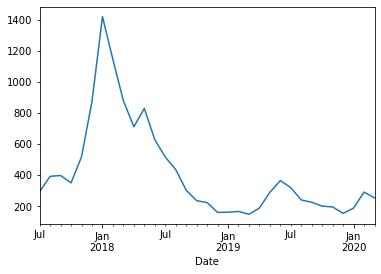

In [21]:
highs = df['High'].resample('M').max()
highs.plot()

In [22]:
# different aggregation on different columns in parallel using dict type
df1 = df.resample('W').agg({'High': 'max', 'Low': 'min', 'Open': 'mean', 'Close': 'mean', 'Volume': 'mean'})
df1.head(3)

,High,Low,Open,Close,Volume
Date,,,,,
2017-07-02,293.73,253.23,268.066486,268.202162,2.185035e+06
2017-07-09,285.00,231.25,261.337024,261.062083,1.337349e+06
2017-07-16,240.33,130.26,196.193214,195.698393,2.986756e+06


In [23]:
# aggregate data.column on its own function
df1 = df.resample('W').agg({
    'Close': 'mean', 
    'High': 'max', 
    'Low': 'min'
})

# rename the columns with aggregated function
df1 = df1.rename(columns={'Close': 'mean_close', 'High': 'max_high', 'Low': 'min_low'})

,mean_close,max_high,min_low
Date,,,
2017-07-02,268.202162,293.73,253.23
2017-07-09,261.062083,285.00,231.25
2017-07-16,195.698393,240.33,130.26


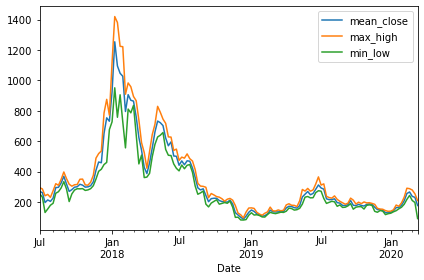

In [24]:
df1.head(3)
df1.plot()
plt.tight_layout()
plt.show()

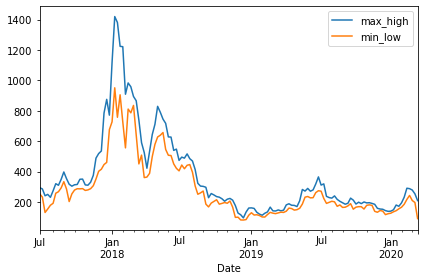

In [25]:
# only plot show columns indicated
df1[['max_high', 'min_low']].plot()
plt.tight_layout()

In [28]:
# ??? Not working on time series: combine aggregation on function and renaming 
# * named aggregation not working *
df1 = df.resample('W').agg(
    mean_Close = ('Close', np.mean),
    max_High = ('High', 'max'),
    min_Low = ('Low', 'min')    
    )

TypeError: aggregate() missing 1 required positional argument: 'func'

In [29]:
df.resample('W').agg(
        min_low=pd.NamedAgg(column='Low', aggfunc='min'),
        max_high=pd.NamedAgg(column='High', aggfunc='max'),
        average_close=pd.NamedAgg(column='Close', aggfunc=np.mean),
    )

TypeError: aggregate() missing 1 required positional argument: 'func'